Selected features are: Index([], dtype='object')
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12          

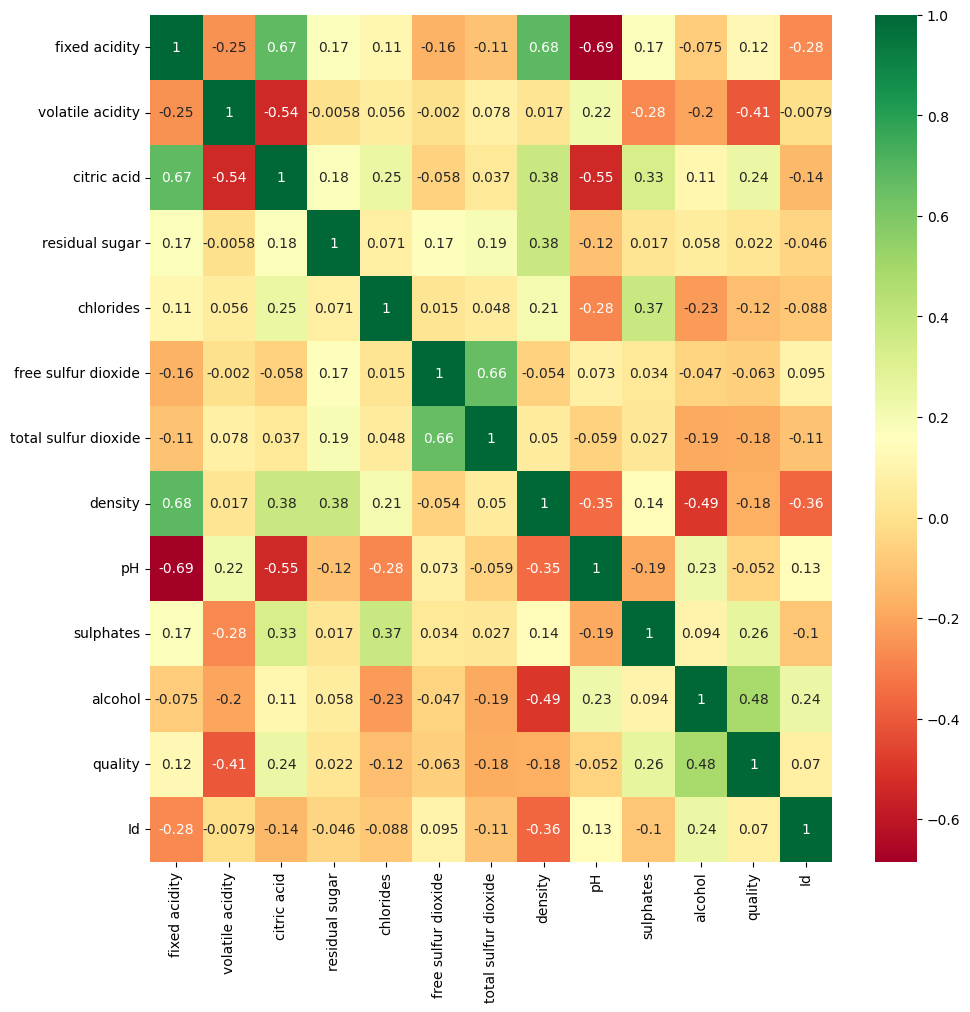

In [4]:
#PYTHON CODE SAVE ON MODEL.PY 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the dataset
data = pd.read_csv('C:\\Users\\manik\\Desktop\\New folder\\al.csv')

# Correlation analysis
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11, 11))
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
#plt.show()

threshold = 0.5

selected_features = corrmat.columns[corrmat.abs().mean() > threshold]
print("Selected features are:", selected_features)
print(data)
# Define the features (X) and the target (y)
X = data[['free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]  # Include relevant features
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

# Save the trained model to a pickle file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)




In [ ]:
#BACKEND FLASK CODE SAVE APP.PY
import pickle
from flask import Flask, request, render_template, redirect, url_for

app = Flask(__name__)

# Load the trained model
with open('linear_regression_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [ ]:
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        try:
            # Get input values from the HTML form
            free_sulfur_dioxide = float(request.form['free_sulfur_dioxide'])
            total_sulfur_dioxide = float(request.form['total_sulfur_dioxide'])
            density = float(request.form['density'])
            pH = float(request.form['pH'])
            sulphates = float(request.form['sulphates'])
            alcohol = float(request.form['alcohol'])
                        # Make predictions using the loaded model
            prediction = model.predict([[free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]])

            return render_template('result.html', prediction=f'Predicted Quality: {prediction[0]:.2f}')
        except Exception as e:
            return render_template('index.html', error=f'Error: {e}')

if __name__ == '__main':
    app.run(debug=True)

In [ ]:
    HTML CODE INDEX.HTML
    <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Wine Quality Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
        }

        h1 {
            color: #333;
        }

        form {
            margin: 20px auto;
            width: 60%;
            padding: 20px;
            border: 1px solid #ccc;
            border-radius: 10px;
            background: #f9f9f9;
        }

        label {
            display: block;
            font-weight: bold;
            margin-top: 10px;
        }

        input {
            width: 100%;
            padding: 5px;
            margin: 5px 0;
        }

        input[type="submit"] {
            background: #333;
            color: white;
            border: none;
            padding: 10px 20px;
            cursor: pointer;
        }

        input[type="submit"]:hover {
            background: #555;
        }
    </style>
</head>
<body>
    <h1>Wine Quality Prediction</h1>
    <form method="post" action="/predict">
        <label for="free_sulfur_dioxide">Free Sulfur Dioxide:</label>
        <input type="number" step="0.01" name="free_sulfur_dioxide" required><br>

        <label for="total_sulfur_dioxide">Total Sulfur Dioxide:</label>
        <input type="number" step="0.01" name="total_sulfur_dioxide" required><br>

        <label for="density">Density:</label>
        <input type="number" step="0.0001" name="density" required><br>

        <label for="pH">pH:</label>
        <input type="number" step="0.01" name="pH" required><br>

        <label for="sulphates">Sulphates:</label>
        <input type="number" step="0.01" name="sulphates" required><br>

        <label for="alcohol">Alcohol:</label>
        <input type="number" step="0.01" name="alcohol" required><br>

        <input type="submit" value="Predict">
    </form>
</body>
</html>


In [ ]:
RESULT.HTML
<!DOCTYPE html>
<html>
<head>
    <title>Wine Quality Prediction</title>
    <style>
        /* Apply styles to the container */
        .container {
            text-align: center;
            background-color: #f0f0f0;
            padding: 20px;
            margin: 0 auto;
            width: 80%;
        }
        
        /* Style for the heading */
        .heading {
            font-size: 24px;
            color: #333;
            margin-top: 10px;
        }
        
        /* Style for the prediction text */
        .prediction {
            font-size: 18px;
            color: #0073e6;
            margin-top: 20px;
        }
        
        /* Style for the buttons */
        .btn {
            display: inline-block;
            padding: 10px 20px;
            background-color: #0073e6;
            color: #fff;
            text-decoration: none;
            margin: 20px;
            border-radius: 5px;
            font-weight: bold;
        }
        
        /* Hover effect for buttons */
        .btn:hover {
            background-color: #005bb9;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Wine Quality Prediction Result</h1>
        <p>{{ prediction }}</p>
        
    </div>
    <p><a href="http://127.0.0.1:5000">Go back to the homepage</a></p>
</body>
</html>


In [ ]:
# HTML FILES SAVE ON TEMPLATES FLODER